# Analysis and edge detection

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from image_utils import rgb2gray

### Loading images

In [2]:
lviv = mpimg.imread('../data/images/lviv.jpg')
prague = mpimg.imread('../data/images/prague.jpg')

In [3]:
type(lviv), type(prague)

(numpy.ndarray, numpy.ndarray)

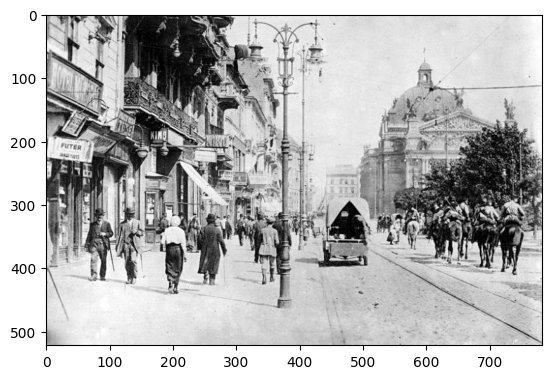

In [4]:
plt.imshow(lviv);

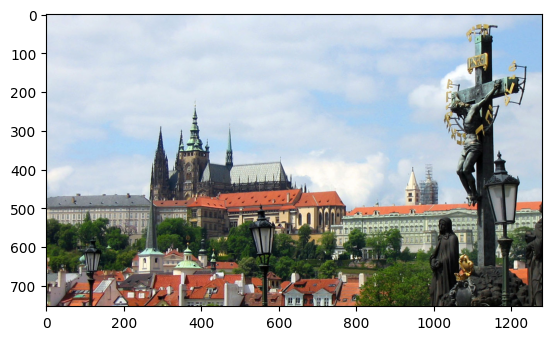

In [5]:
plt.imshow(prague);

In [6]:
lviv.shape, lviv.dtype

((522, 783, 3), dtype('uint8'))

In [7]:
prague.shape, prague.dtype

((753, 1280, 3), dtype('uint8'))

_Lviv_ is essentially a black-and-white image, so there's no need to process it as a 3-channel image.
Therefore, we'll convert it to the grayscale.

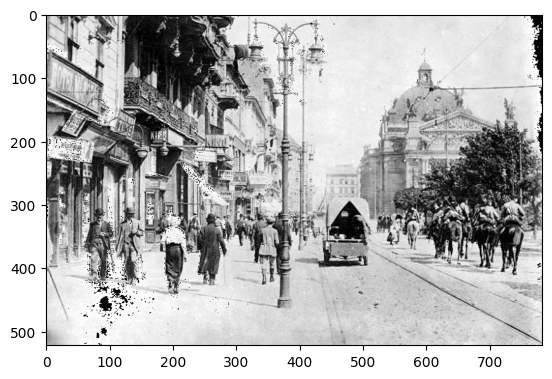

In [8]:
lviv = rgb2gray(lviv)
plt.imshow(lviv, cmap='gray')

In [9]:
lviv.shape, lviv.dtype

((522, 783), dtype('uint8'))

## Play with channels

In [24]:
def zero_channel(img: np.ndarray, channel_idx: int) -> np.ndarray:
    img_copy = img.copy()
    img_copy[:, :, channel_idx] = 0
    return img_copy

What will happen if we zero the R (red) channel?

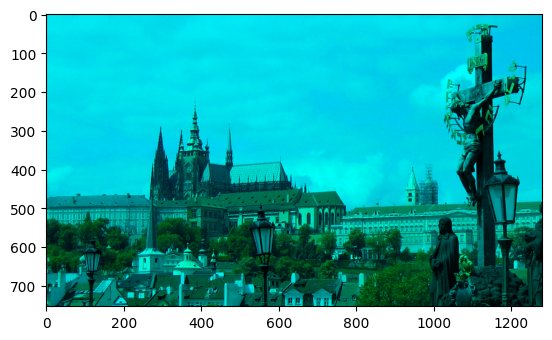

In [25]:
prague_red_zero = zero_channel(prague, 0)
plt.imshow(prague_red_zero);

And the G (green) channel?

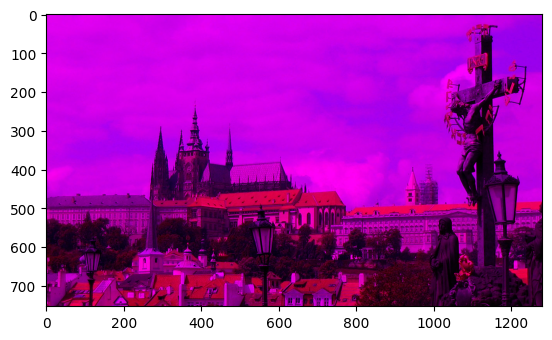

In [26]:
prague_green_zero = zero_channel(prague, 1)
plt.imshow(prague_green_zero);

An the B (blue) channel?

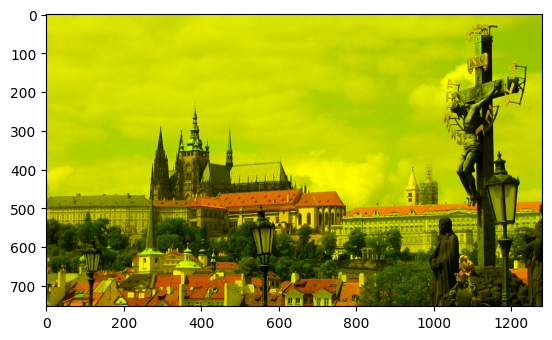

In [27]:
prague_blue_zero = zero_channel(prague, 2)
plt.imshow(prague_blue_zero);

## Images' histograms

Histogram of _Lviv_ pixels' intesity:

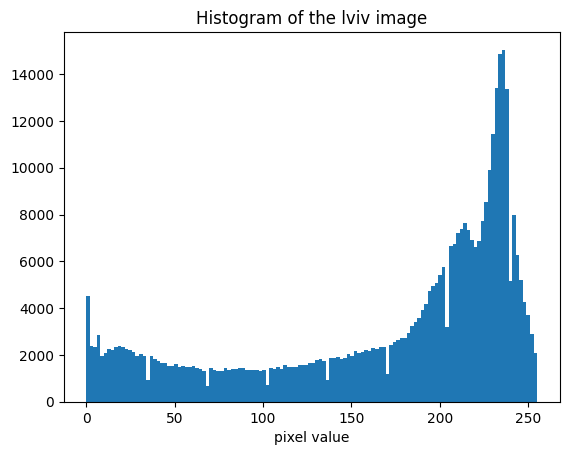

In [33]:
plt.hist(
    lviv.ravel(),
    bins=128,
)
plt.title("Histogram of the lviv image")
plt.xlabel("pixel value")
plt.show()

And now histogram of _Prague_. Notice that _Prague_ is a 3-dimension image, so we need to plot histogram for each channel individually.

In [11]:
prague.shape

(753, 1280, 3)

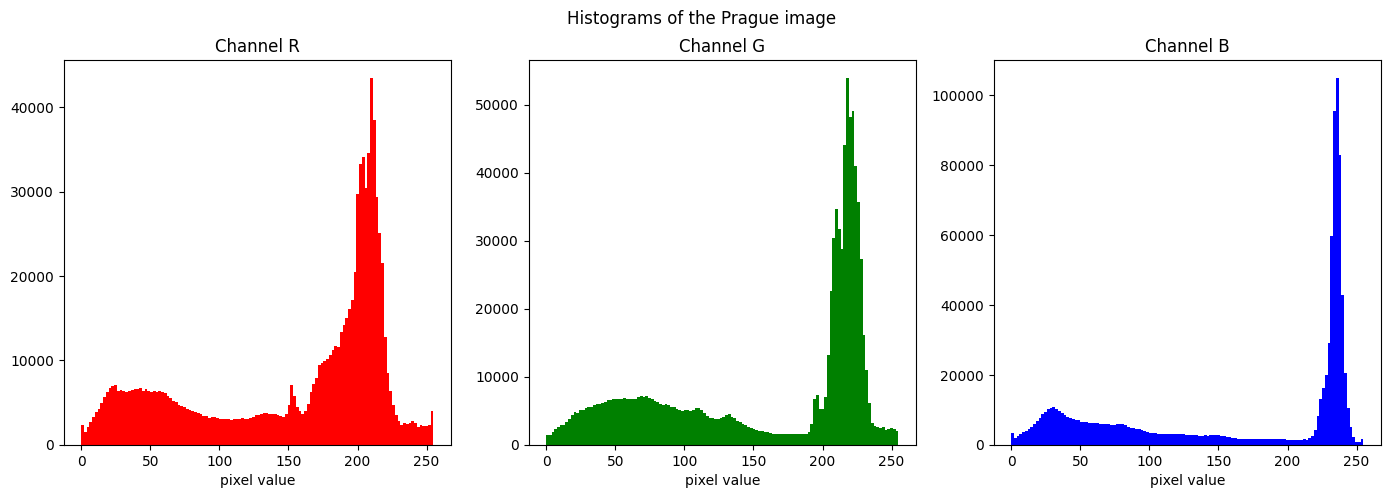

In [34]:
fig, axes = plt.subplots(1,3, figsize=(17,5))
fig.suptitle("Histograms of the Prague image")
channels = ('R', 'G', 'B')
channel2color = {
    'R': 'red',
    'G': 'green',
    'B': 'blue',
}

for i, (ax, channel) in enumerate(zip(axes, channels)):
    ax.set_title(f"Channel {channel}")
    ax.hist(
        prague[:,:,i].ravel(),
        bins=128,
        color=channel2color[channel]
    )
    ax.set_xlabel("pixel value")

## Images thresholding

We will try to threshold images on pixels' values, in order to better understand their histograms and to extract some objects from images.

In [49]:
def threshold_image(
    img: np.ndarray,
    channel_idx: int | None,
    threshold: int,
) -> None:
    """Plots two subplots:
    1. thresholded image
    2. channel's histogram with threshold indicated
    """
    img_channel = img[:, :, channel_idx] if channel_idx is not None else img
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Threshold = {threshold}")

    axes[0].set_title("Thresholded image")
    axes[0].imshow(img_channel > threshold)

    axes[1].set_title("Threshold on histogram")
    axes[1].hist(img_channel.ravel(), bins=128)
    axes[1].set_xlabel("pixel value")
    axes[1].axvline(x=threshold, ymin=0, ymax=100000, c='r')

    plt.show()

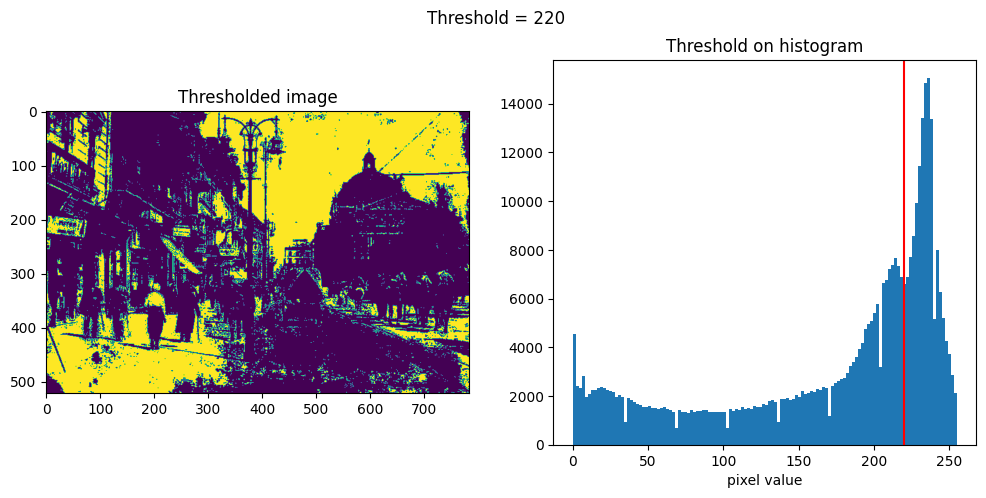

In [51]:
threshold_image(lviv, None, threshold=220)

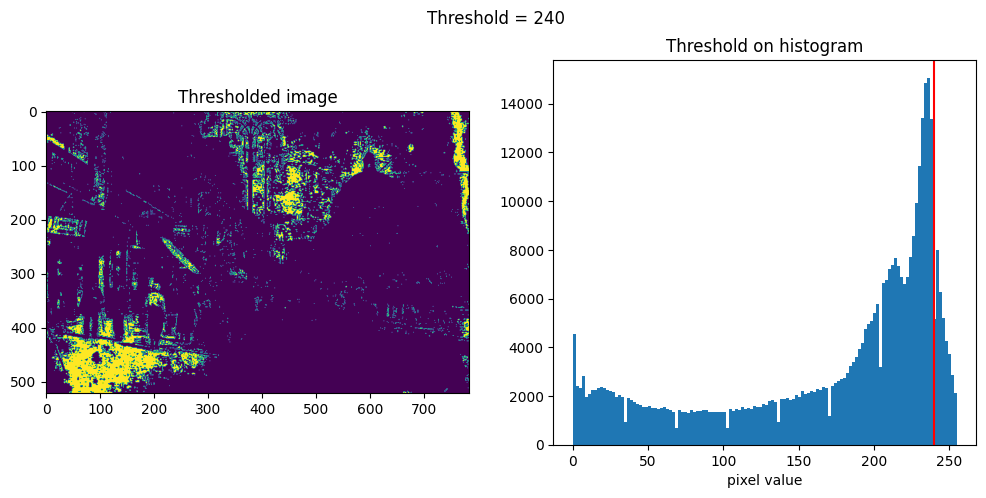

In [52]:
threshold_image(lviv, None, threshold=240)

Let's try changing all pixels above 220 to 0.

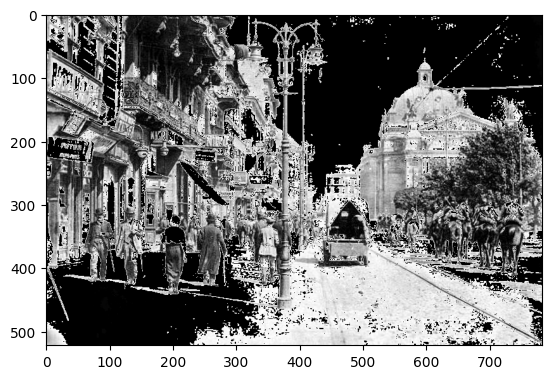

In [55]:
lviv_copy = lviv.copy()
lviv_copy[lviv > 220] = 0
plt.imshow(lviv_copy, cmap='grey')

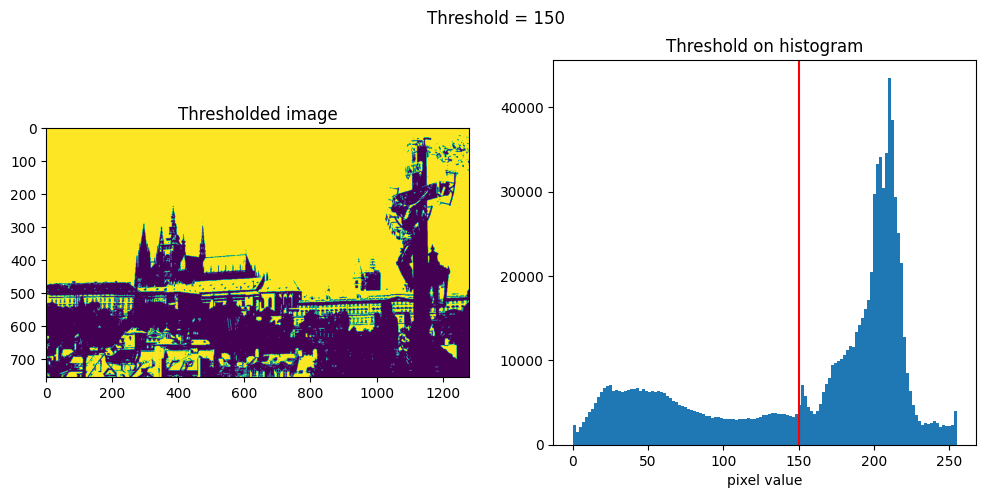

In [70]:
threshold_image(prague, 0, 150)

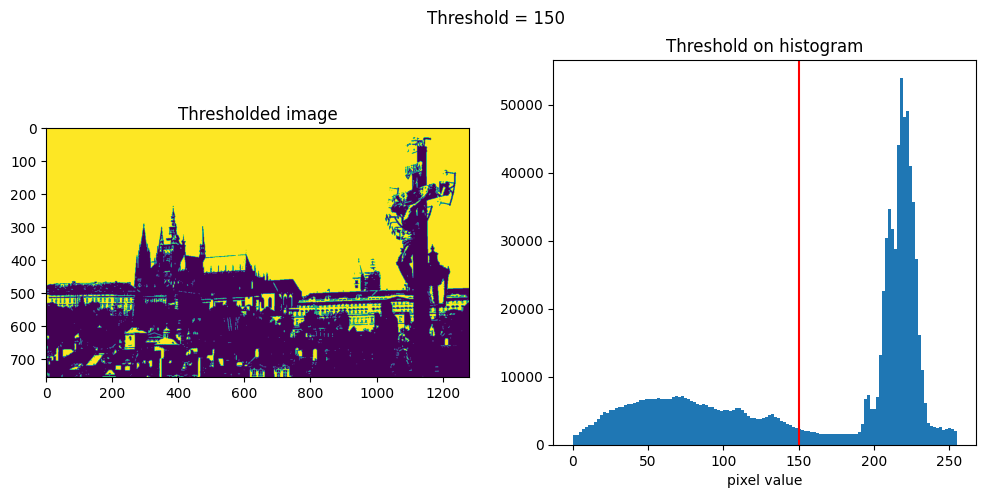

In [81]:
threshold_image(prague, 1, 150)

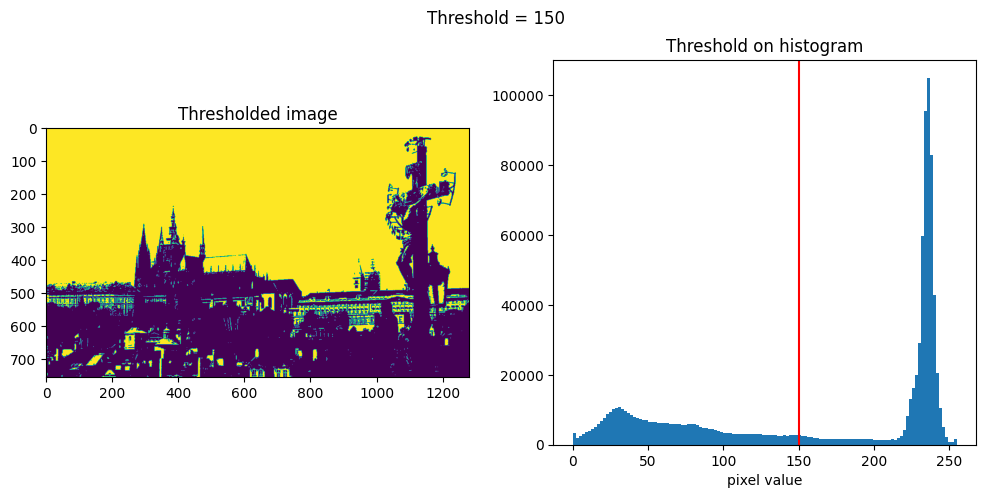

In [82]:
threshold_image(prague, 2, 150)

Basing on this observation, we can extract the position of the roofs pixels and change them.

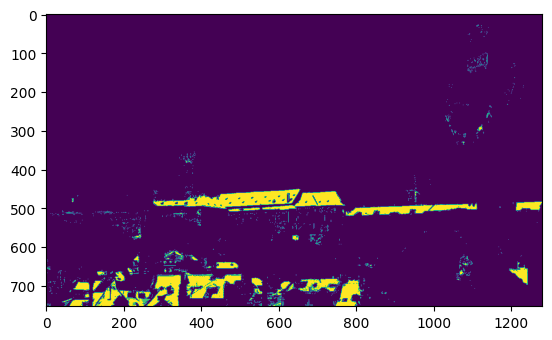

In [79]:
roof_pixels_positions = np.logical_and(
    np.logical_and(
        prague[:, :, 0] > 150,
        prague[:, :, 1] < 150,
    ),
    prague[:, :, 2] < 150
)
plt.imshow(roof_pixels_positions);

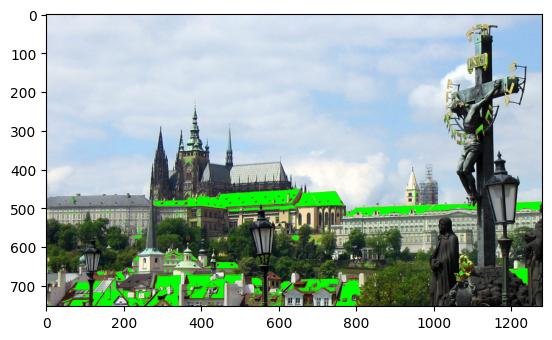

In [80]:
prague_modified = prague.copy()
prague_modified[roof_pixels_positions] = [0, 255, 0]
plt.imshow(prague_modified);